# Detection on Adult Dataset

In [2]:
import sys
import pandas as pd
import sklearn
import keras
import matplotlib.pyplot as plt

In [3]:
asd_data = pd.read_csv(r"C:\LEARNING\Detection-of-Neurodevelopment-Disorder-main\Detection-of-Neurodevelopment-Disorder-main\Autism-Adult-Data Plus Description File\csv_result-Autism-Adult-Data.csv", na_values=['?'])

In [4]:
asd_data.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,NaN,no,no,Egypt,no,2,18 and more,NaN,NO


In [5]:
asd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               704 non-null    int64  
 1   A1_Score         704 non-null    int64  
 2   A2_Score         704 non-null    int64  
 3   A3_Score         704 non-null    int64  
 4   A4_Score         704 non-null    int64  
 5   A5_Score         704 non-null    int64  
 6   A6_Score         704 non-null    int64  
 7   A7_Score         704 non-null    int64  
 8   A8_Score         704 non-null    int64  
 9   A9_Score         704 non-null    int64  
 10  A10_Score        704 non-null    int64  
 11  age              702 non-null    float64
 12  gender           704 non-null    object 
 13  ethnicity        609 non-null    object 
 14  jundice          704 non-null    object 
 15  austim           704 non-null    object 
 16  contry_of_res    704 non-null    object 
 17  used_app_before 

In [6]:
asd_data.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,352.500000,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,203.371581,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,176.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,352.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,528.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


# Feature Exploration 

In [7]:
records = len(asd_data.index)

yes = len(asd_data[asd_data['Class/ASD'] == 'YES'])

no = len(asd_data[asd_data['Class/ASD'] == 'NO'])

yes_percent = float(yes) / records *100

print("Total number of records: {}".format(records))
print("Patients diagnoised with disorder: {}".format(yes))
print("Patients not diagnoised with disorder: {}".format(no))
print("Percentage of patients diagnoised with disorder: {:.2f}%".format(yes_percent))

Total number of records: 704
Patients diagnoised with disorder: 189
Patients not diagnoised with disorder: 515
Percentage of patients diagnoised with disorder: 26.85%


# Clean Datasets

In [8]:
# .isnull() will replace the null values with boolean value True and otherwise with False.
# Pandas DataFrame.loc attribute access a group of rows and columns by label(s) or a boolean array in the given DataFrame.
asd_data.loc[
             (asd_data['age'].isnull()) |
             (asd_data['gender'].isnull()) |
             (asd_data['ethnicity'].isnull()) |
             (asd_data['jundice'].isnull())|
             (asd_data['austim'].isnull()) |
             (asd_data['contry_of_res'].isnull())|
             (asd_data['used_app_before'].isnull())|
             (asd_data['result'].isnull())|
             (asd_data['age_desc'].isnull())|
             (asd_data['relation'].isnull())
            ]

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
4,5,1,0,0,0,0,0,0,1,0,...,f,NaN,no,no,Egypt,no,2,18 and more,NaN,NO
12,13,0,1,1,1,1,1,0,0,1,...,f,NaN,no,no,Bahamas,no,6,18 and more,NaN,NO
13,14,1,0,0,0,0,0,1,1,0,...,m,NaN,no,no,Austria,no,4,18 and more,NaN,NO
14,15,1,0,0,0,0,0,1,1,0,...,f,NaN,no,no,Argentina,no,4,18 and more,NaN,NO
19,20,0,0,0,0,0,0,1,1,0,...,m,NaN,yes,no,United Arab Emirates,no,3,18 and more,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,653,0,0,0,0,0,0,0,0,0,...,f,NaN,no,no,United States,no,1,18 and more,NaN,NO
658,659,0,0,1,1,0,0,1,0,0,...,m,NaN,no,no,Azerbaijan,no,3,18 and more,NaN,NO
659,660,1,1,1,1,1,1,0,0,1,...,m,NaN,no,no,Pakistan,no,8,18 and more,NaN,YES
666,667,0,0,0,0,0,0,0,1,0,...,m,NaN,no,no,Iraq,no,1,18 and more,NaN,NO


In [9]:
'''
here I didn't use mean, median or any other forms to replace 'NaN' values because there are lot of categorical columns
preset in the dataset, and it would make things complicated
'''
asd_data.dropna(inplace = True) #As the missing data is random, dropna will drop the rows with missing data
asd_data.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,349.725780,0.740558,0.469622,0.481117,0.520525,0.525452,0.307061,0.428571,0.665025,0.341544,0.597701,30.215107,5.077176
std,207.856238,0.438689,0.499487,0.500054,0.499989,0.499762,0.461654,0.495278,0.472370,0.474617,0.490765,17.287470,2.522717
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.000000
50%,329.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,5.000000
75%,533.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


# Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

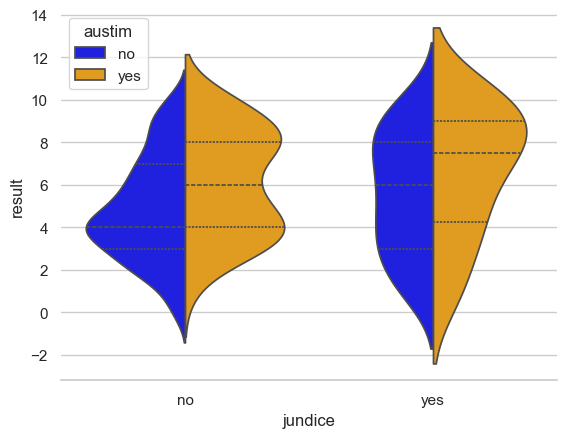

In [11]:
sns.violinplot(x="jundice", y="result", hue="austim", data=asd_data, split=True,
                inner="quart", palette={'yes': "orange", 'no': "blue"})
sns.despine(left=True)

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 27.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, Use

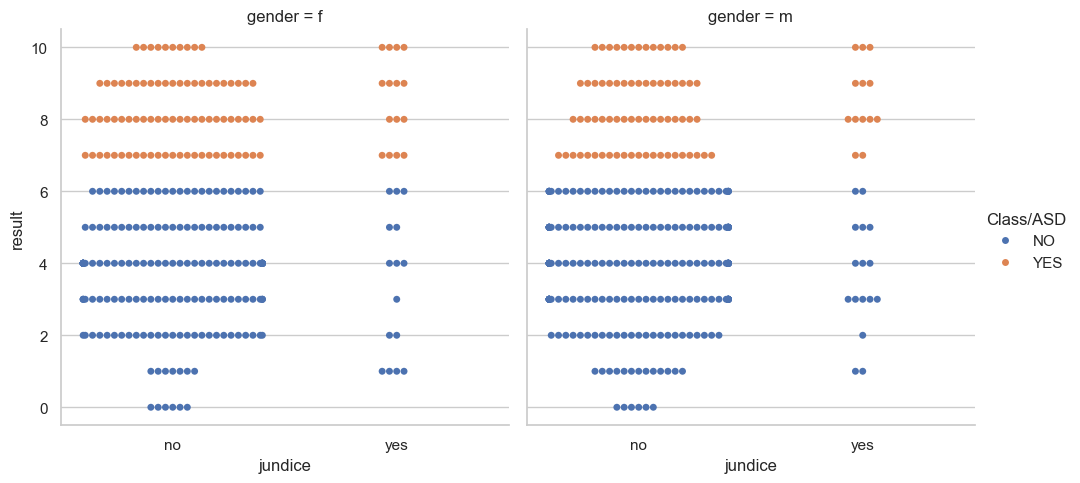

In [12]:
sns.catplot(x="jundice", y="result", hue="Class/ASD", col="gender", data=asd_data, kind="swarm")


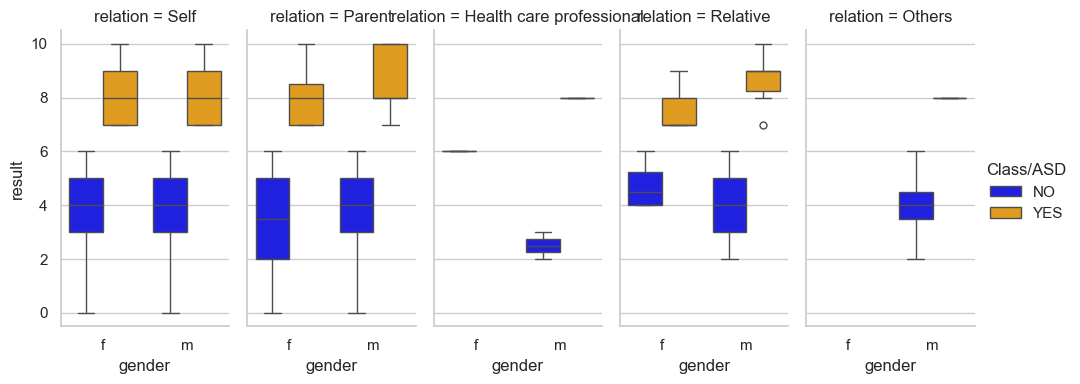

In [13]:
sns.catplot(x="gender", y="result", hue="Class/ASD", col="relation",
            data=asd_data, kind="box", height=4, aspect=.5,
            palette={'YES': "orange", 'NO': "blue"})

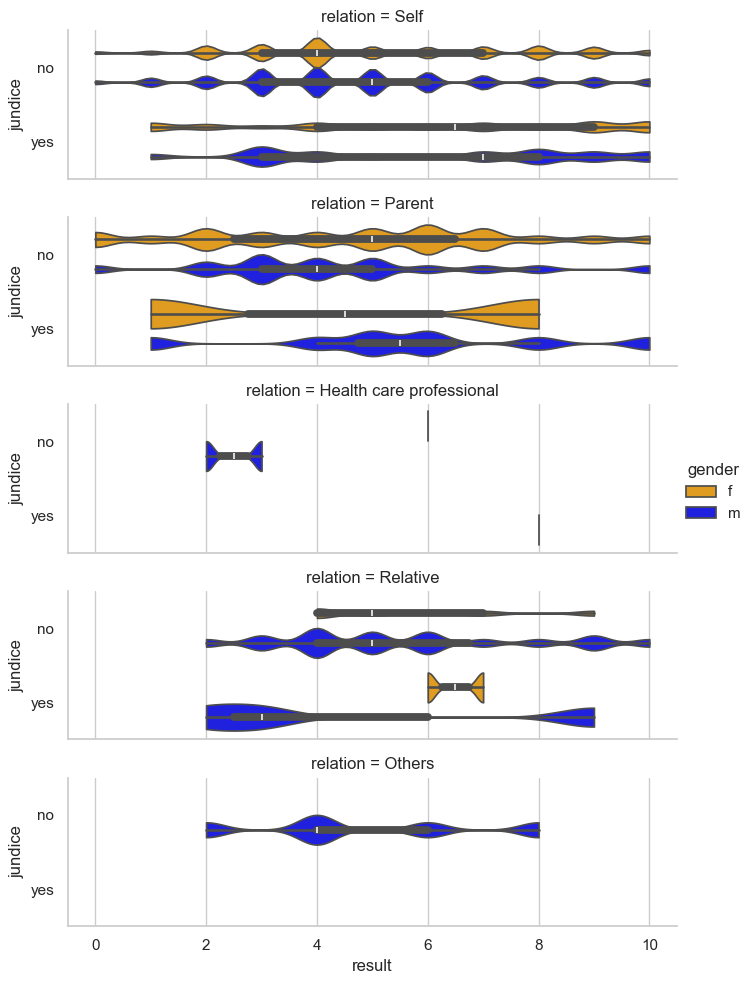

In [14]:
g = sns.catplot(x="result", y="jundice",
                hue="gender", row="relation",
                data=asd_data, kind="violin",
                height=2, aspect=3.5,
                palette={'f': "orange", 'm': "blue"},
                dodge=True, cut=0, bw_adjust=0.2)

# Pre-Processing

In [15]:
# Split the data into features and target label
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 
                         'contry_of_res', 'result', 'relation',
                         'A1_Score','A2_Score','A3_Score','A4_Score','A5_Score',
                         'A6_Score','A7_Score','A8_Score','A9_Score','A10_Score']]

In [16]:
# Some of our models require the input data to be normalized, 
# so I proceed to normalize the attribute data. Here, I use preprocessing.MinMaxScaler().

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'result']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.024590,f,White-European,no,no,United States,0.6,Self,1,1,1,1,0,0,1,1,0,0
1,0.019126,m,Latino,no,yes,Brazil,0.5,Self,1,1,0,1,0,0,0,1,0,1
2,0.027322,m,Latino,yes,yes,Spain,0.8,Parent,1,1,0,1,1,0,1,1,1,1
3,0.049180,f,White-European,no,yes,United States,0.6,Self,1,1,0,1,0,0,1,1,0,1
5,0.051913,m,Others,yes,no,United States,0.9,Self,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,0.027322,f,Pasifika,no,no,Australia,1.0,Self,1,1,1,1,1,1,1,1,1,1
699,0.021858,f,White-European,no,no,Russia,0.7,Self,0,1,0,1,1,0,1,1,1,1
700,0.046448,m,Hispanic,no,no,Mexico,0.3,Parent,1,0,0,0,0,0,0,1,0,1
702,0.049180,m,South Asian,no,no,Pakistan,0.6,Self,1,0,0,1,1,0,1,0,1,1


In [17]:
# One-Hot encoding

features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Uruguay,contry_of_res_Viet Nam,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.024590,0.6,1,1,1,1,0,0,1,1,...,False,False,True,False,False,False,False,False,False,True
1,0.019126,0.5,1,1,0,1,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True
2,0.027322,0.8,1,1,0,1,1,0,1,1,...,False,False,False,False,False,False,False,True,False,False
3,0.049180,0.6,1,1,0,1,0,0,1,1,...,False,False,True,False,False,False,False,False,False,True
5,0.051913,0.9,1,1,1,1,1,0,1,1,...,False,False,True,False,False,False,False,False,False,True


In [18]:
# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

94 total features after one-hot encoding.


In [19]:
print(encoded)

['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others', 'jundice_no', 'jundice_yes', 'austim_no', 'austim_yes', 'contry_of_res_Afghanistan', 'contry_of_res_AmericanSamoa', 'contry_of_res_Angola', 'contry_of_res_Armenia', 'contry_of_res_Aruba', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Bahamas', 'contry_of_res_Bangladesh', 'contry_of_res_Belgium', 'contry_of_res_Bolivia', 'contry_of_res_Brazil', 'contry_of_res_Burundi', 'contry_of_res_Canada', 'contry_of_res_Chile', 'contry_of_res_China', 'contry_of_res_Costa Rica', 'contry_of_res_Cyprus', 'contry_of_res_Czech Republic', 'contry_of_res_Ecuador', 'contry_of_res_Egypt'

Text(0, 0.5, 'Frequency')

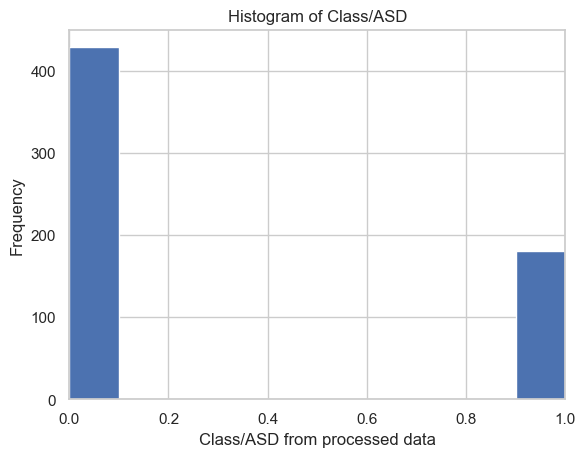

In [20]:
#visualization of classes asd_data dataset

import matplotlib.pyplot as plt

plt.hist(asd_classes, bins=10)

plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

# Shuffle and Split Data

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)

In [22]:
print("Number of samples in Training set : ", X_train.shape[0])
print("Number of samples in testing set : ", X_test.shape[0])

Number of samples in Training set :  487
Number of samples in testing set :  122


# Machine Learning Techniques

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_class = lr.predict(X_test)
lr.predict(X_test)

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

[[77  2]
 [ 0 43]]


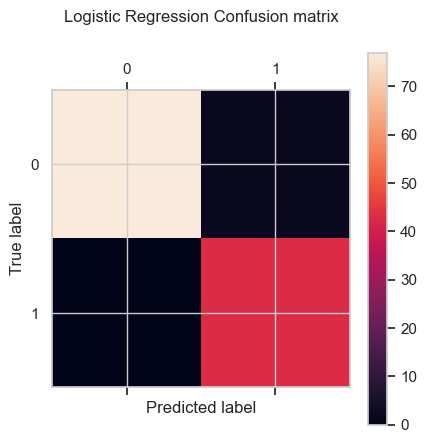

In [24]:
#confusion matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


plt.matshow(confusion)
plt.title('Logistic Regression Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [25]:
print("Classification Accuracy :", (TP + TN) / float(TP + TN + FP + FN))
print("Classification Error :", (FP + FN) / float(TP + TN + FP + FN))
print("Senstivity :", TP / float(FN + TP))
print("Specificity :", TN / (TN + FP))
print("False Positive Rate :", FP / float(TN + FP))
print("Precision :", TP / float(TP + FP))

Classification Accuracy : 0.9836065573770492
Classification Error : 0.01639344262295082
Senstivity : 1.0
Specificity : 0.9746835443037974
False Positive Rate : 0.02531645569620253
Precision : 0.9555555555555556


In [26]:
#F1 score
from sklearn.metrics import f1_score
predictions_test = lr.predict(X_test)
f1_score(y_test,predictions_test)

0.9772727272727273

In [27]:
#F- beta score

from sklearn.metrics import fbeta_score
predictions_test = lr.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9641255605381166

## Decision Tree 

In [28]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [29]:
y_pred_class = dtc.predict(X_test)

[[79  0]
 [ 0 43]]


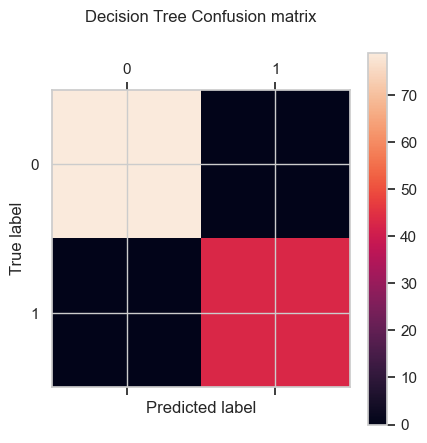

In [30]:
#confusion matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

plt.matshow(confusion)
plt.title('Decision Tree Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [31]:
print("Classification Accuracy :", (TP + TN) / float(TP + TN + FP + FN))
print("Classification Error :", (FP + FN) / float(TP + TN + FP + FN))
print("Senstivity :", TP / float(FN + TP))
print("Specificity :", TN / (TN + FP))
print("False Positive Rate :", FP / float(TN + FP))
print("Precision :", TP / float(TP + FP))

Classification Accuracy : 1.0
Classification Error : 0.0
Senstivity : 1.0
Specificity : 1.0
False Positive Rate : 0.0
Precision : 1.0


In [32]:
#Score metric model performance

dtc.score(X_test, y_test)

1.0

In [33]:
#F1 score
from sklearn.metrics import f1_score
predictions_test = dtc.predict(X_test)
f1_score(y_test,predictions_test)

1.0

In [34]:
#F- beta score

from sklearn.metrics import fbeta_score
predictions_test = dtc.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

## K-Nearest Neighbor

In [35]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train.values, y_train.values)
y_pred_class = knn.predict(X_test.values)
knn.predict(X_test.values)

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

[[76  3]
 [ 2 41]]


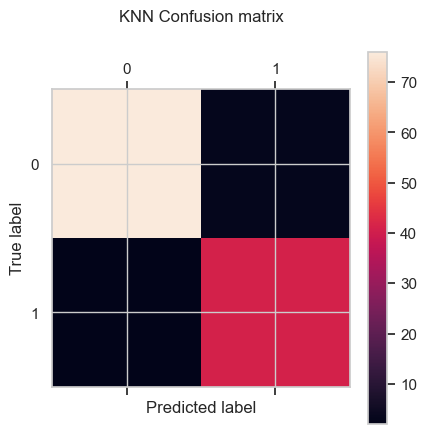

In [36]:
#confusion matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


plt.matshow(confusion)
plt.title('KNN Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [37]:
print("Classification Accuracy :", (TP + TN) / float(TP + TN + FP + FN))
print("Classification Error :", (FP + FN) / float(TP + TN + FP + FN))
print("Senstivity :", TP / float(FN + TP))
print("Specificity :", TN / (TN + FP))
print("False Positive Rate :", FP / float(TN + FP))
print("Precision :", TP / float(TP + FP))

Classification Accuracy : 0.9590163934426229
Classification Error : 0.040983606557377046
Senstivity : 0.9534883720930233
Specificity : 0.9620253164556962
False Positive Rate : 0.0379746835443038
Precision : 0.9318181818181818


In [38]:
#F1 score
from sklearn.metrics import f1_score
predictions_test = knn.predict(X_test.values)
f1_score(y_test,predictions_test)

0.9425287356321839

In [39]:
#F- beta score

from sklearn.metrics import fbeta_score
predictions_test = knn.predict(X_test.values)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9360730593607306

In [41]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = []
cvscores = []
for n in range(10, 50):
    knn = KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, features_final.values, asd_classes.values, cv=10)
    neighbors.append(n)
    cvscores.append(cv_scores.mean())

#print(arr)   

print(neighbors[cvscores.index(max(cvscores))])

NameError: name 'cross_val_score' is not defined

## Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_class = mnb.predict(X_test)
mnb.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

[[71  8]
 [ 5 38]]


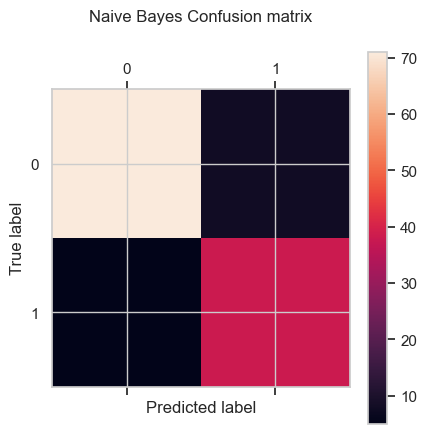

In [43]:
#confusion matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


plt.matshow(confusion)
plt.title('Naive Bayes Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [44]:
print("Classification Accuracy :", (TP + TN) / float(TP + TN + FP + FN))
print("Classification Error :", (FP + FN) / float(TP + TN + FP + FN))
print("Senstivity :", TP / float(FN + TP))
print("Specificity :", TN / (TN + FP))
print("False Positive Rate :", FP / float(TN + FP))
print("Precision :", TP / float(TP + FP))

Classification Accuracy : 0.8934426229508197
Classification Error : 0.10655737704918032
Senstivity : 0.8837209302325582
Specificity : 0.8987341772151899
False Positive Rate : 0.10126582278481013
Precision : 0.8260869565217391


In [45]:
#F1 score
from sklearn.metrics import f1_score
predictions_test = mnb.predict(X_test)
f1_score(y_test,predictions_test)

0.8539325842696629

In [46]:
#F- beta score

from sklearn.metrics import fbeta_score
predictions_test = mnb.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.8370044052863436

# Sequential Model (CNN)

In [47]:
# Imports
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation


np.random.seed(42)

In [48]:
# Building the model architecture with one layer of length 4


model = Sequential()
model.add(Dense(8, activation='relu', input_dim= 94))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
   
    
model.summary()

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [50]:
# Running and evaluating the model
hist = model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_data=(X_test, y_test), 
          verbose=2)

Epoch 1/100
31/31 - 1s - 38ms/step - accuracy: 0.7002 - loss: 0.6825 - val_accuracy: 0.6475 - val_loss: 0.6771
Epoch 2/100
31/31 - 0s - 3ms/step - accuracy: 0.7187 - loss: 0.6617 - val_accuracy: 0.6475 - val_loss: 0.6577
Epoch 3/100
31/31 - 0s - 2ms/step - accuracy: 0.7187 - loss: 0.6346 - val_accuracy: 0.6475 - val_loss: 0.6353
Epoch 4/100
31/31 - 0s - 3ms/step - accuracy: 0.7187 - loss: 0.6030 - val_accuracy: 0.6475 - val_loss: 0.6092
Epoch 5/100
31/31 - 0s - 2ms/step - accuracy: 0.7187 - loss: 0.5723 - val_accuracy: 0.6475 - val_loss: 0.5812
Epoch 6/100
31/31 - 0s - 2ms/step - accuracy: 0.7187 - loss: 0.5384 - val_accuracy: 0.6475 - val_loss: 0.5494
Epoch 7/100
31/31 - 0s - 3ms/step - accuracy: 0.7248 - loss: 0.5112 - val_accuracy: 0.6475 - val_loss: 0.5188
Epoch 8/100
31/31 - 0s - 2ms/step - accuracy: 0.7372 - loss: 0.4783 - val_accuracy: 0.6721 - val_loss: 0.4847
Epoch 9/100
31/31 - 0s - 2ms/step - accuracy: 0.7864 - loss: 0.4443 - val_accuracy: 0.7623 - val_loss: 0.4507
Epoch 10/

Text(0.5, 1.0, 'Loss')

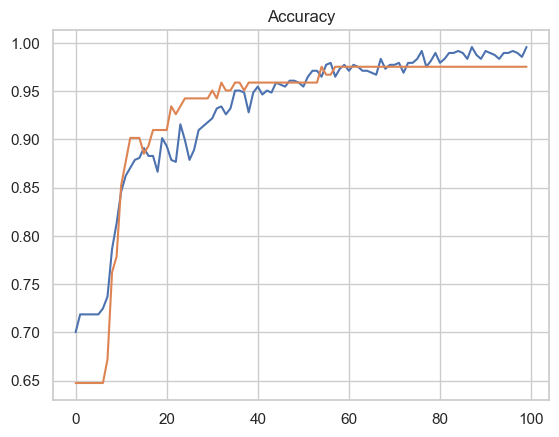

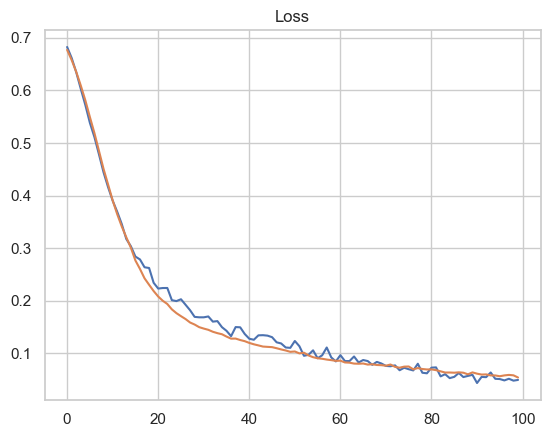

In [51]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(100)

plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title ('Accuracy')
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs, val_loss)
plt.title('Loss')

In [52]:
#accuracy
model.evaluate(X_test, y_test, verbose=0)[1]

0.9754098653793335

In [62]:
probabilities = model.predict(X_test)

# # Convert probabilities to class labels
# predictions = np.argmax(probabilities, axis=1)

# print(predictions)

print(probabilities)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
[[9.36281919e-01]
 [1.67989981e-07]
 [1.24633220e-06]
 [9.60833430e-01]
 [9.84779000e-01]
 [6.53109907e-07]
 [9.81103897e-01]
 [9.87898946e-01]
 [2.61594479e-09]
 [1.42203835e-05]
 [8.28246847e-02]
 [1.62841901e-01]
 [2.01535408e-06]
 [8.42976689e-01]
 [1.88845734e-04]
 [2.45951669e-05]
 [7.40650983e-04]
 [1.84007026e-02]
 [3.23584892e-08]
 [9.77429867e-01]
 [2.64516893e-05]
 [9.71887112e-01]
 [1.58377006e-05]
 [9.02475655e-01]
 [5.96355676e-08]
 [4.10857350e-02]
 [1.81149323e-06]
 [4.89882180e-12]
 [1.74710385e-05]
 [9.66672957e-01]
 [1.45691885e-07]
 [8.72567415e-01]
 [1.26255024e-03]
 [1.00902791e-04]
 [9.00180042e-01]
 [5.94239414e-01]
 [9.53691065e-01]
 [9.35512722e-01]
 [1.20808090e-06]
 [3.56313024e-07]
 [9.83050048e-01]
 [7.25934631e-04]
 [9.70599711e-01]
 [5.36535867e-04]
 [1.34430791e-03]
 [2.41787372e-08]
 [3.99391951e-07]
 [4.23315532e-06]
 [8.92529845e-01]
 [4.17742413e-05]
 [1.86887592e-01]
 [9.69471991e-01]
 [1.63815959e-04]
 [9.770

In [63]:
# predictions = np.argmax(probabilities, axis=-1)
predictions = (probabilities > 0.5).astype("int32")
# p.argmax(model.predict(x), axis=-1
print(predictions)

[[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]


[[77  2]
 [ 1 42]]


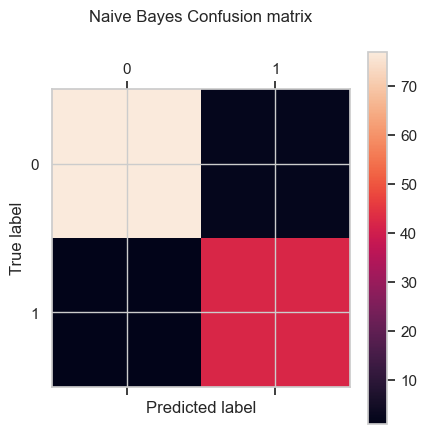

In [64]:
confusion = metrics.confusion_matrix(y_test, predictions)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


plt.matshow(confusion)
plt.title('Naive Bayes Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [65]:
print("Classification Accuracy :", (TP + TN) / float(TP + TN + FP + FN))
print("Classification Error :", (FP + FN) / float(TP + TN + FP + FN))
print("Senstivity :", TP / float(FN + TP))
print("Specificity :", TN / (TN + FP))
print("False Positive Rate :", FP / float(TN + FP))
print("Precision :", TP / float(TP + FP))

Classification Accuracy : 0.9754098360655737
Classification Error : 0.02459016393442623
Senstivity : 0.9767441860465116
Specificity : 0.9746835443037974
False Positive Rate : 0.02531645569620253
Precision : 0.9545454545454546


In [66]:
#F1 score
from sklearn.metrics import f1_score
predictions_test = predictions
f1_score(y_test,predictions_test)

0.9655172413793104

In [67]:
#F- beta score

from sklearn.metrics import fbeta_score
predictions_test = predictions
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.958904109589041